In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skopt.plots import plot_convergence
from skopt import forest_minimize
import Model_Evaluation as me

In [85]:
data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
data

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,2008-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,2008-02,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,2008-03,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,2008-04,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,2008-05,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,2020-08,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,2020-09,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,2020-10,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [86]:
data = data.dropna(axis = 1)
data

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,2008-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,2008-02,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,2008-03,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,2008-04,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,2008-05,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,2020-08,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,2020-09,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,2020-10,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [87]:
data['month'] = data['Year_Month'].str.split('-', expand=True)[1]
year_month = data['Year_Month']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
data.drop(['Year_Month'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x",month
0,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,...,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000,01
1,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,...,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000,02
2,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,...,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000,03
3,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,...,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000,04
4,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,...,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,...,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000,07
151,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,...,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000,08
152,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,...,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000,09
153,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,115.098017,...,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000,10


### Since month is a categorical variable, we will need to do one-hot encoding.

In [90]:
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data['month'].values.reshape(-1,1)).toarray()
dfone_hot = pd.DataFrame(ohe, columns=['month_'+str(ohc.categories_[0][j]) 
                                           for j in range(len(ohc.categories_[0]))])
data = data.join(dfone_hot)

In [91]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
151,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,115.098017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
target = data['Sum of Sales']/100000
features = data.drop(['Sum of Sales'], axis=1)

In [93]:
# Standardizing the features based on unit variance
features = StandardScaler().fit_transform(features)

# split train test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.071, shuffle=False, random_state=60616)

In [94]:
X_train.shape

(143, 83)

In [95]:
X_test.shape

(12, 83)

### Hyperparameter Tuning

In [96]:
def objective(params):
    # unpacking the parameters
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBRegressor(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Handle some numerical issue going on
    if np.abs(mse + 1) < 0.01 or mse < -1.0:
        return 0.0
    else:
        return mse

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1039
Function value obtained: 16.1262
Current minimum: 16.1262
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0342
Function value obtained: 16.1401
Current minimum: 16.1262
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0582
Function value obtained: 6.2593
Current minimum: 6.2593
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0707
Function value obtained: 17.4867
Current minimum: 6.2593
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1252
Function value obtained: 7.2473
Current minimum: 6.2593
Iteration No: 6 started. Evalu

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.7205
Function value obtained: 6.0082
Current minimum: 5.4556
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.7005
Function value obtained: 7.9302
Current minimum: 5.4556
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7093
Function value obtained: 5.5312
Current minimum: 5.4556
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.6944
Function value obtained: 7.2895
Current minimum: 5.4556
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.6648
Function value obtained: 6.4856
Current minimum: 5.4556
Iteration No: 26 started. Sea

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.7115
Function value obtained: 5.8980
Current minimum: 5.4556
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.7121
Function value obtained: 5.5752
Current minimum: 5.4556
Iteration No: 34 started. Searching for the next optimal point.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.7477
Function value obtained: 5.8980
Current minimum: 5.4556
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.7173
Function value obtained: 5.5734
Current minimum: 5.4556
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.7434
Function value obtained: 4.9964
Current minimum: 4.9964
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.6707
Function value obtained: 6.4975
Current minimum: 4.9964
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.7132
Function value obtained: 4.9315
Current minimum: 4.9315
Iteration No: 39 started. Sea

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.6990
Function value obtained: 4.9768
Current minimum: 4.1519
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.6912
Function value obtained: 5.8167
Current minimum: 4.1519
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.6829
Function value obtained: 17.4952
Current minimum: 4.1519
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.7078
Function value obtained: 16.0503
Current minimum: 4.1519
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.7281
Function value obtained: 7.1360
Current minimum: 4.1519
Iteration No: 47 started. S

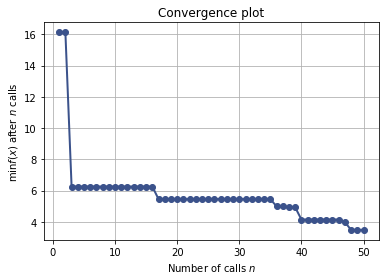

In [97]:
# Bayesian Optimization
num_thread = 20
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

space = [(0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Minimum MSE found: {:6.5f}'.format(res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

plot_convergence(res_fm);

### Regression using optimal parameters

In [98]:
reg = XGBRegressor(learning_rate=0.09, gamma=1.25, max_depth=6, min_child_weight=3,
                    reg_lambda=1.25, reg_alpha=1.5, random_state=60616)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [99]:
# For Training data
me.evaluate_model(y_pred_train,y_train)

			Model Performance

Mean Absolute Percentage Error: 0.1297822191071711

Mean Absolute Error: 0.3019509541003996

BIAS: 0.010843037166131112

Mean Squared Error: 0.016812718063012388

Root Mean Squared Error: 0.12966386567973512


In [100]:
# For testing data
me.evaluate_model(y_pred_test,y_test)

			Model Performance

Mean Absolute Percentage Error: 0.4252326283663785

Mean Absolute Error: 1.5942141011472073

BIAS: 0.8828535715128588

Mean Squared Error: 9.353165144796128

Root Mean Squared Error: 3.05829448300783


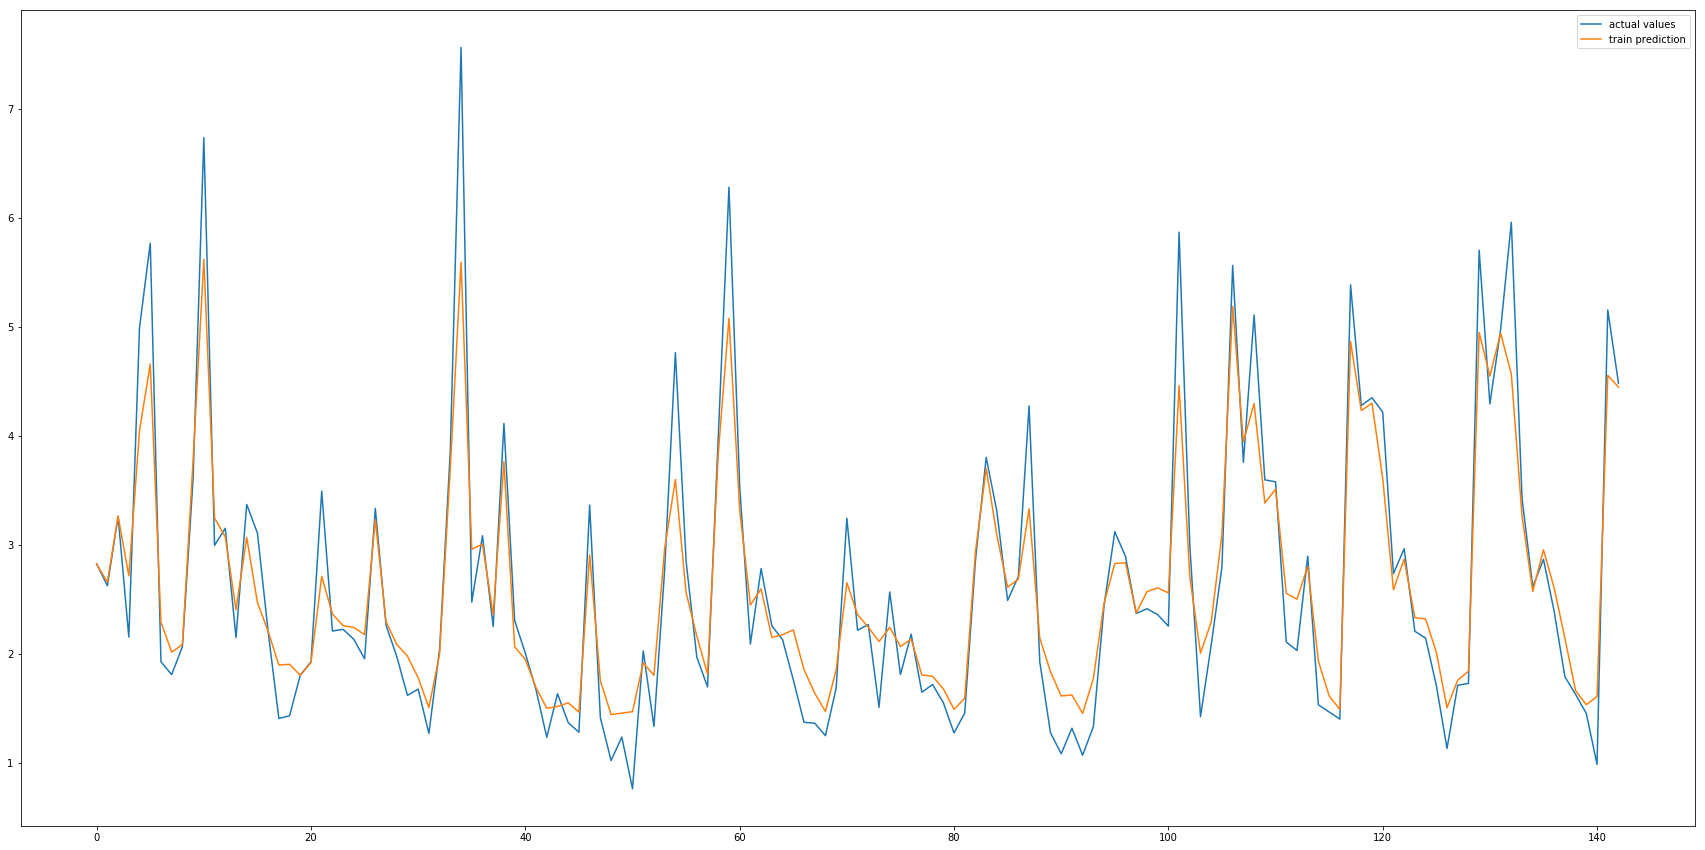

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=((30,15)))
plt.plot(target[0:143], label="actual values")
plt.plot(y_pred_train, label='train prediction')
plt.legend()
plt.show()

In [104]:
actual = np.array(y_test)
actual

array([ 5.2552555,  5.7331244,  2.894873 ,  2.4624648,  2.1938156,
        1.2867176,  1.3671228,  1.503481 ,  1.5606695,  4.6871096,
       11.184468 ,  4.2916677])

In [105]:
lists = [actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Actual', 1: 'Predicted'})
df

,Actual,Predicted
0,525525.55,418591.403961
1,573312.44,329780.340195
2,289487.30,224321.222305
3,246246.48,261829.042435
4,219381.56,281611.466408
5,128671.76,267238.926888
6,136712.28,281677.865982
7,150348.10,174284.815788
8,156066.95,197601.330280
9,468710.96,170082.175732


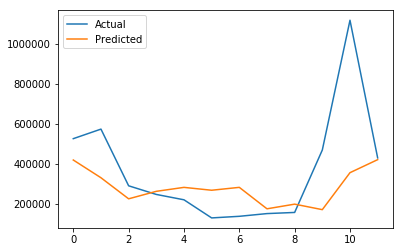

In [106]:
plt.plot(df.Actual, label='Actual')
plt.plot(df.Predicted, label='Predicted')
plt.legend()
plt.show()

In [112]:
lists = [np.array(year_month[-12:]), actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Year_Month', 1: 'Actual', 2: 'Predicted'})
df

,Year_Month,Actual,Predicted
0,2019-12,525525.55,418591.403961
1,2020-01,573312.44,329780.340195
2,2020-02,289487.30,224321.222305
3,2020-03,246246.48,261829.042435
4,2020-04,219381.56,281611.466408
5,2020-05,128671.76,267238.926888
6,2020-06,136712.28,281677.865982
7,2020-07,150348.10,174284.815788
8,2020-08,156066.95,197601.330280
9,2020-09,468710.96,170082.175732
